In [248]:
#importando bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from pycaret.classification import *
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

In [251]:
#importando os dados
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [28]:
data.shape

(7043, 20)

In [21]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)

In [42]:
#informações sobre as variáveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Insights:
- Sem valores faltantes
- a maioria estão no formato object
- temos 20 variáveis independentes e 1 variável dependente

In [169]:
#separando vetor alvo
y = data['Churn']

#dataframe sem o alvo
X = data.drop(columns='Churn', axis=1)

In [35]:
X.shape

(7043, 20)

In [39]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, shuffle=True, train_size=0.75)

In [41]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((5282, 20), (1761, 20), (5282,), (1761,))

# gender
Gênero do cliente

In [85]:
#proporção de homens e mulheres 
X['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

In [82]:
tabela_gender = pd.crosstab(X['gender'], y, normalize='index')
tabela_gender

Churn,No,Yes
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


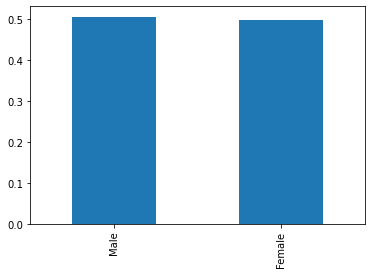

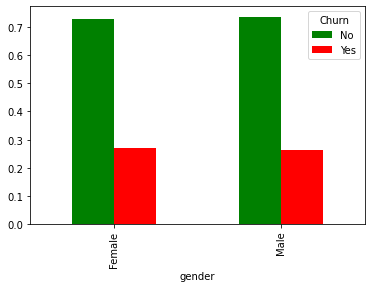

In [83]:
X['gender'].value_counts(normalize=True).plot(kind='bar')
tabela_gender.plot(kind='bar', color=['green','red'])
plt.show()

# SeniorCitizen
se o cliente é idoso ou não

In [86]:
#proporção de homens e mulheres 
X['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

In [87]:
tabela_SeniorCitizen = pd.crosstab(X['SeniorCitizen'], y, normalize='index')
tabela_SeniorCitizen

Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


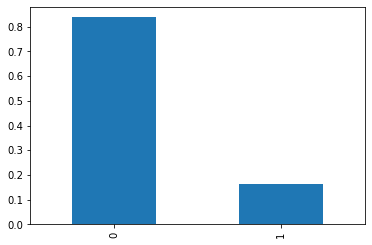

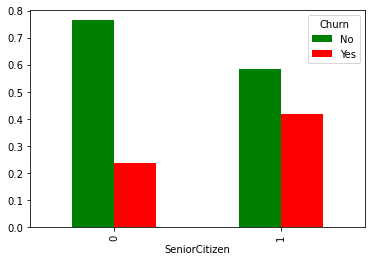

In [88]:
X['SeniorCitizen'].value_counts(normalize=True).plot(kind='bar')
tabela_SeniorCitizen.plot(kind='bar', color=['green','red'])
plt.show()

# Preprocessamento

In [283]:
#importando os dados
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#separando vetor alvo
y = data['Churn']
#dataframe sem o alvo
X = data.drop(columns='Churn', axis=1)


#binarizando a feature 'gender'
X['gender'] = X['gender'].map({'Female':1, 'Male':0})

#binarizando a feature 'Partner'
X['Partner'] = X['Partner'].map({'Yes':1, 'No':0})

#binarizando a feature 'Dependents'
X['Dependents'] = X['Dependents'].map({'Yes':1, 'No':0})

#binarizando a feature 'PaperlessBilling'
X['PaperlessBilling'] = X['PaperlessBilling'].map({'Yes':1, 'No':0})

#binarizando a feature 'PhoneService'
X['PhoneService'] = X['PhoneService'].map({'Yes':1, 'No':0})

#criando dummies nas features com mais de duas classes
X = pd.get_dummies(X, dtype='int64', columns=['MultipleLines', 'OnlineSecurity',
                               'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                               'StreamingTV', 'StreamingMovies', 'Contract',
                              'PaymentMethod', 'InternetService' ])

#retirando ' ' antes e depois dos valores
X['TotalCharges'] = X['TotalCharges'].map(lambda i: i.strip())
#substituindo valores faltantes por zero
X['TotalCharges'] = X['TotalCharges'].map(lambda i: 0 if i=='' else i)
#transformando os valores em números float
X['TotalCharges'] = X['TotalCharges'].map(lambda i:float(i))

#retirando a feature 'costumerID' pois não será útil em nosso modelo
X = X.drop(columns='customerID', axis=1)

In [280]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelagem

In [284]:
mdl = DecisionTreeClassifier()
scores = cross_val_score(mdl, X, y, scoring='accuracy').mean()
print(scores)
#0.7265362886315246 minmax

0.7278143952835667


In [285]:
mdl = RandomForestClassifier(random_state=29)
scores = cross_val_score(mdl, X, y, scoring='accuracy').mean()
print(scores)
#0.7891549454803535 minmax

0.7898651727530808


In [286]:
mdl = LGBMClassifier(random_state=29)
scores = cross_val_score(mdl, X, y, scoring='accuracy').mean()
print(scores)
#0.7941234111878186 minmax

0.7941234111878186


In [287]:
mdl = KNeighborsClassifier()
scores = cross_val_score(mdl, X, y, scoring='accuracy').mean()
print(scores)
#0.7603300011291052 minmax

0.7603291946254597


In [288]:
mdl = SVC()
scores = cross_val_score(mdl, X, y, scoring='accuracy').mean()
print(scores)
#0.7971034421575586 minmax

0.7346301575908123


In [289]:
mdl = LogisticRegression()
scores = cross_val_score(mdl, X, y, scoring='accuracy').mean()
print(scores)
#0.8027834457061745 minmax

0.8037778647009486


In [290]:
mdl = XGBClassifier(random_state=29, verbosity=0)
scores = cross_val_score(mdl, X, y, scoring='accuracy').mean()
print(scores)

0.7830476966255888


# Pycaret

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [301]:

#importando os dados
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#separando vetor alvo
y = data['Churn']
#dataframe sem o alvo
X = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'TotalCharges', 'MonthlyCharges', 'Churn']]

#binarizando a feature 'gender'
X['gender'] = X['gender'].map({'Female':1, 'Male':0})

#binarizando a feature 'Partner'
X['Partner'] = X['Partner'].map({'Yes':1, 'No':0})

#binarizando a feature 'Dependents'
X['Dependents'] = X['Dependents'].map({'Yes':1, 'No':0})

#binarizando a feature 'PhoneService'
X['PhoneService'] = X['PhoneService'].map({'Yes':1, 'No':0})

#retirando ' ' antes e depois dos valores
X['TotalCharges'] = X['TotalCharges'].map(lambda i: i.strip())
#substituindo valores faltantes por zero
X['TotalCharges'] = X['TotalCharges'].map(lambda i: 0 if i=='' else i)
#transformando os valores em números float
X['TotalCharges'] = X['TotalCharges'].map(lambda i:float(i))

#substituindo valores faltantes por zero
X['MonthlyCharges'] = X['MonthlyCharges'].map(lambda i: 0 if i=='' else i)
#transformando os valores em números float
X['MonthlyCharges'] = X['MonthlyCharges'].map(lambda i:float(i))

In [302]:

s = setup(X, target = 'Churn', numeric_features = ['MonthlyCharges', 'TotalCharges', 'tenure'], 
          fold_shuffle=True)

,Description,Value
0,session_id,5187
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 9)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


# Vamos comparar os modelos

In [303]:
best = compare_models(fold = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7927,0.8132,0.6878,0.7802,0.7807,0.4128,0.4230,2.4420
ridge,Ridge Classifier,0.7905,0.0000,0.6741,0.7760,0.7744,0.3917,0.4068,0.0910
lr,Logistic Regression,0.7897,0.8144,0.6847,0.7765,0.7778,0.4053,0.4145,7.0050
gbc,Gradient Boosting Classifier,0.7886,0.8196,0.6865,0.7758,0.7777,0.4063,0.4141,0.3120
lda,Linear Discriminant Analysis,0.7860,0.8078,0.6862,0.7735,0.7758,0.4025,0.4093,0.0610
lightgbm,Light Gradient Boosting Machine,0.7838,0.8034,0.6805,0.7705,0.7726,0.3930,0.4007,0.2020
ada,Ada Boost Classifier,0.7828,0.8151,0.6793,0.7693,0.7716,0.3903,0.3977,0.1380
xgboost,Extreme Gradient Boosting,0.7751,0.7892,0.6726,0.7614,0.7645,0.3729,0.3789,0.9060
rf,Random Forest Classifier,0.7688,0.7735,0.6626,0.7534,0.7572,0.3523,0.3583,0.3330
knn,K Neighbors Classifier,0.7606,0.7373,0.6568,0.7468,0.7506,0.3373,0.3423,0.0370


In [304]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# Selecionando o melhor algoritmo

In [305]:
catboost = create_model('catboost', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8073,0.8080,0.7044,0.7960,0.7958,0.4504,0.4611
1,0.8093,0.8162,0.7107,0.7986,0.7991,0.4607,0.4697
2,0.7992,0.8320,0.6933,0.7867,0.7866,0.4278,0.4391
3,0.7627,0.7879,0.6685,0.7516,0.7556,0.3554,0.3578
4,0.7931,0.8362,0.7015,0.7825,0.7852,0.4307,0.4353
5,0.7708,0.7980,0.6617,0.7548,0.7582,0.3539,0.3612
6,0.7890,0.7868,0.6642,0.7737,0.7697,0.3767,0.3965
7,0.7992,0.8277,0.6859,0.7863,0.7840,0.4182,0.4337
8,0.7992,0.8181,0.6908,0.7865,0.7858,0.4246,0.4372
9,0.7972,0.8210,0.6969,0.7851,0.7864,0.4298,0.4381


In [307]:
evaluate_model(catboost)

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


# Otimizando o modelo

In [308]:
tuned_cat = tune_model(catboost, fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7972,0.8104,0.6800,0.7834,0.7812,0.4068,0.4228
1,0.8012,0.8120,0.6927,0.7886,0.7882,0.4283,0.4405
2,0.8073,0.8296,0.6988,0.7961,0.7936,0.4448,0.4596
3,0.7809,0.7954,0.6735,0.7661,0.7685,0.3808,0.3892
4,0.7931,0.8445,0.6966,0.7814,0.7837,0.4246,0.4308
5,0.7748,0.7830,0.6595,0.7578,0.7598,0.3549,0.3654
6,0.7931,0.7945,0.6743,0.7788,0.7761,0.3956,0.4126
7,0.7992,0.8282,0.6834,0.7863,0.7831,0.4150,0.4320
8,0.8174,0.8271,0.7057,0.8089,0.8024,0.4667,0.4868
9,0.8114,0.8293,0.7213,0.8019,0.8031,0.4767,0.4832


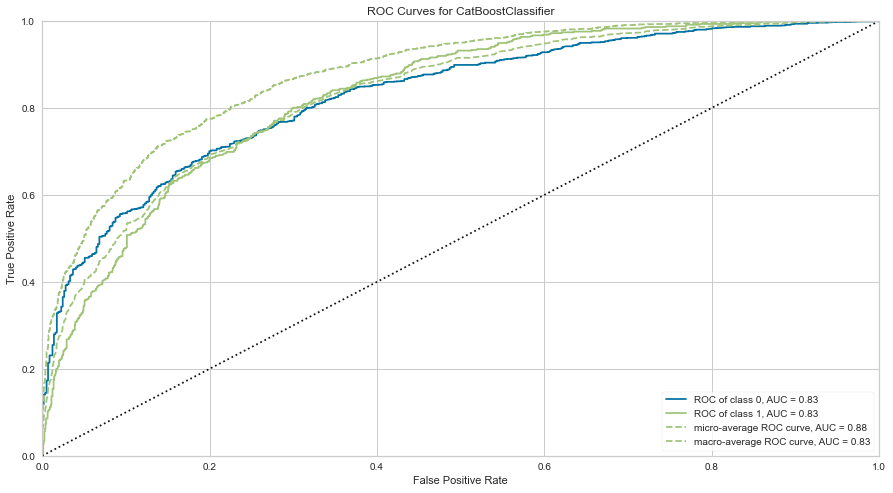

In [312]:
fig=plt.figure(figsize=(15,8))
plot_model(tuned_cat)

# Visualizando o erro do modelo

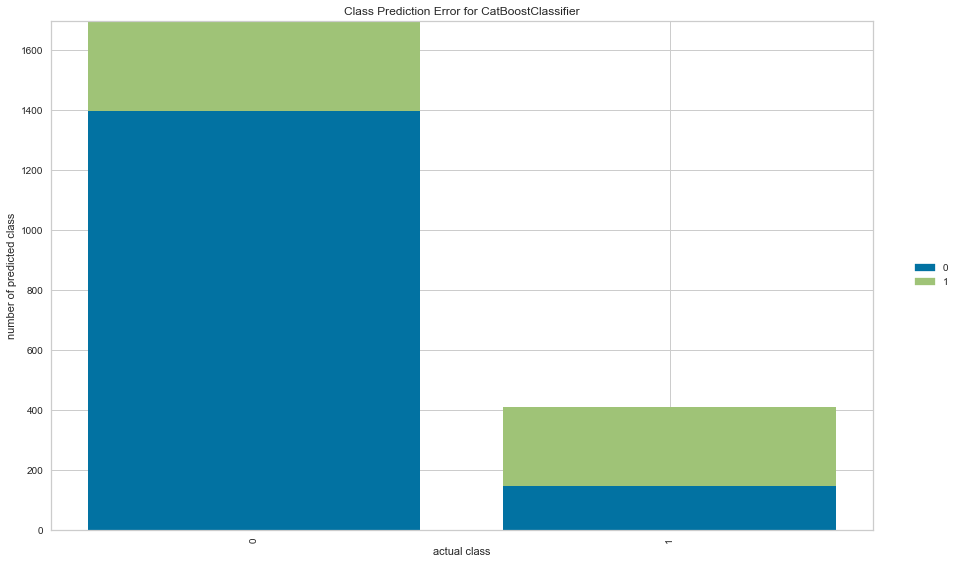

In [316]:
fig=plt.figure(figsize=(15,8))
plot_model(tuned_cat, plot = 'error')

# Visualizando as features importantes

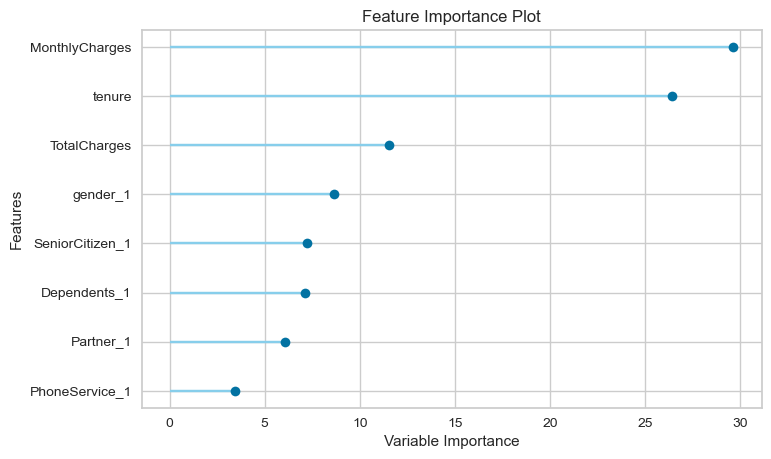

In [317]:
plot_model(tuned_cat, plot='feature')

# Finaliza o modelo

In [318]:
final_cat = finalize_model(tuned_cat)

# Persistindo o modelo

In [319]:
save_model(final_cat,'modelo-final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['MonthlyCharges',
                                                           'TotalCharges',
                                                           'tenure'],
                                       target='Churn', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Churn')),
                 ('fix_perfect', Remove_100(t